### Settings

In [1]:
which_data = 'c'
# 'c' for color images
# 'g' for grayscale
# 'f' for fourier


take_subset = True
# True to only use 2 classes
# False to use all 10
# note capitalization

do_PCA = True
components = 150
# True will run PCA to reduce the dimension before doing diffusion/LE
# False will skip this step
#
# if take_subset was set to False, I recommend doing PCA
#
# components is the number of components you get from PCA

## File Path
data_path = "C:\\Users\\Eli\\Documents\\DATA\\InclusiveImage_Unsupervised-master\\cifar" 

## Import libraries

In [2]:
exec(open("auxiliary\\imports.py").read())
%matplotlib inline

## Import raw data

In [3]:
exec(open("auxiliary\\loadCFAR.py").read())
## data: raw_images
## classes: cls
## index_labels: indices for each class

# for i in range(10):
#     print(index_labels[:, i])

Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_1
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_2
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_3
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_4
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_5


## Create grayscale and Fourier matrices (if desired)

In [4]:
# print(raw_images.shape)

if which_data == 'c':
    images = raw_images
    
elif which_data == 'g':
    images = np.zeros([50000,32,32])
    for i in range(50000):
        images[i,:,:] = 0.21*raw_images[i,:,:,0] + 0.72*raw_images[i,:,:,1] + 0.07*raw_images[i,:,:,2]
    
#     pylab.imshow(images[100,:,:], cmap = plt.get_cmap('gray'))
#     pylab.show()
    
elif which_data == 'f':
    images = np.zeros([50000, 32, 32])
    grayscale = np.zeros([50000,32,32])
    for i in range(50000):
        grayscale[i,:,:] = 0.21*raw_images[i,:,:,0] + 0.72*raw_images[i,:,:,1] + 0.07*raw_images[i,:,:,2]
        images[i,:,:] = np.fft.fft2(grayscale[i,:,:])
        images[i,:,:] = np.fft.fftshift(images[i,:,:])
        images[i,:,:] = np.abs(images[i,:,:])
    del grayscale
    
    
#     pylab.imshow(images[3,:,:], cmap = plt.get_cmap('gray'))
#     pylab.show()

## Convert original arrays to correct 3072 dim array per image

In [5]:
images=images.ravel()

if which_data == 'c':
    images = images.reshape(-1, 32*32*3)
else:
    images = images.reshape(-1, 32*32)

# Run PCA on image vectors

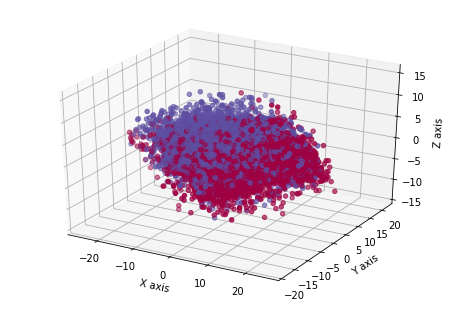

In [6]:
# #RUN PCA on images

# pca_color = PCA(n_components=150)
# pca_gray = PCA(n_components=100)
# pca_fourier = PCA(n_components=100)

if take_subset:
    if do_PCA:

        indices = np.array(index_labels[:,[0, 3]].reshape(index_labels[:, [0, 3]].size), dtype = np.intp)
        
        pca = PCA(n_components=components)
        pca.fit(images[indices])

        reduced = pca.transform(images[indices])
        classes = cls[indices]
    else:
        reduced = images[indices]
        classes = cls[indices]
    
else:
    if do_PCA:
        pca = PCA(n_components=components)

        pca.fit(images)

        reduced = pca.transform(images)
        classes = cls
    else:
        reduced = images
        classes = cls
        
        
fig = plt.figure()
ax=Axes3D(fig)
# ax.set_title("Original data")
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c = classes, cmap=plt.cm.Spectral)
plt.axis('tight')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## KNN on Reduced CIFAR

In [7]:
def train_test(data,labels):    
    from sklearn.model_selection import train_test_split 
    df_2 = pd.DataFrame(data)
    X = df_2
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

    return(X_train, X_test, y_train, y_test)


X_train, X_test, y_train, y_test=train_test(reduced, classes)


# training a KNN classifier
start=datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)

# accuracy on X_test 
accuracy = knn.score(X_test, y_test)
print("KNN Accuracy: " + str(accuracy)) 

# creating a confusion matrix 
# knn_predictions = knn.predict(X_test)  
# cm = confusion_matrix(y_test, knn_predictions)
# print(cm)

end=datetime.datetime.now()
print("KNN Time Taken: " + str(end-start))

KNN Accuracy: 0.8188
KNN Time Taken: 0:00:04.284036


## SVM on Reduced CIFAR

In [8]:
# start=datetime.datetime.now()
# svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
# svm_predictions = svm_model_linear.predict(X_test) 

# # model accuracy for X_test   
# accuracy = svm_model_linear.score(X_test, y_test) 
# print("SVM Accuracy: " + str(accuracy)) 

# # creating a confusion matrix 
# cm = confusion_matrix(y_test, svm_predictions) 
# print(cm)

# end=datetime.datetime.now()
# print("SVM Time Taken: " + str(end-start))